# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [1]:
import pandas as pd
import pickle

### ~ 1.1
### Your code here! ###

In [20]:
articles = pd.read_csv('./data/articles.tsv.gz', compression='gzip', sep='\t', error_bad_lines=False)

b'Skipping line 7: expected 944 fields, saw 945\n'


In [21]:
articles

,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Khulna,0,2,1,0,0,2,0,2,0,...,0,1,1,0,1,1,0,2,1,2
1,Karim_Ansarifard,1,5,1,1,1,3,6,4,5,...,2,2,0,1,2,0,1,0,0,0
2,Poldhu,0,0,1,1,0,1,0,2,2,...,0,2,2,0,0,0,2,1,2,1
3,Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Palmyra,1,4,0,0,0,2,11,2,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56786,Metodologia_della_formazione,1,8,8,9,4,4,2,5,16,...,9,8,7,7,2,14,9,7,6,9
56787,Metal_Black,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
56788,Tonino_Accolla,66,98,84,95,99,79,59,81,77,...,43,40,39,46,33,67,43,53,77,58
56789,The_United_States_Steel_Hour,0,1,4,0,0,0,0,2,0,...,1,1,2,0,0,1,0,0,0,0


In [4]:
topics = pd.read_json('./data/topics.jsonl.gz', compression='infer', lines=True)
# topics = topics.rename(columns={"index": "Name"})

In [5]:
topics

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
0,Chinese_food_therapy,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,Battle_of_Naissus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Battle_of_Stoke_Field,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Smooth_newt,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35606,Banca_Akros,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35607,Arms_Around_You,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35608,Gioventù_bruciata,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35609,Power_Rangers:_Battle_for_the_Grid,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [136]:
mapping = pd.read_pickle("./data/mapping.pickle")

In [137]:
mapping

{'Chinese_food_therapy': 'Dietetica_cinese',
 'Battle_of_Naissus': 'Battaglia_di_Naisso',
 'Battle_of_Stoke_Field': 'Battaglia_di_Stoke_Field',
 'Smooth_newt': 'Lissotriton_vulgaris',
 'Vicente_Aleixandre': 'Vicente_Aleixandre',
 'Piast_dynasty': 'Piast',
 'Antenor': 'Antenore_(scultore)',
 'Cranford,_New_Jersey': 'Cranford_(New_Jersey)',
 'New_Castle,_Indiana': 'New_Castle_(Indiana)',
 'Bugsy': 'Bugsy',
 'Period_6_element': 'Elementi_del_periodo_6',
 'Kite_aerial_photography': "Foto_aerea_con_l'aquilone",
 'World_Economic_Forum': 'Forum_economico_mondiale',
 'Gherman_Titov': 'German_Stepanovič_Titov',
 'Vicarius_Filii_Dei': 'Vicarius_Filii_Dei',
 'SMS_Zrínyi': 'SMS_Zrinyi',
 "Spearman's_rank_correlation_coefficient": 'Coefficiente_di_correlazione_per_ranghi_di_Spearman',
 'Swedish_nobility': 'Nobiltà_svedese',
 'Derrick_Green': 'Derrick_Green',
 'A._Merritt': 'Abraham_Merritt',
 'Lee_Chang-dong': 'Lee_Chang-dong',
 'Shimabara,_Nagasaki': 'Shimabara',
 'George_Mundelein': 'George_Willi

## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

In [22]:
### ~ 2.1
### Your code here! ###
articles = articles[~articles['index'].str.contains("Discussione")]

In [23]:
articles

,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Khulna,0,2,1,0,0,2,0,2,0,...,0,1,1,0,1,1,0,2,1,2
1,Karim_Ansarifard,1,5,1,1,1,3,6,4,5,...,2,2,0,1,2,0,1,0,0,0
2,Poldhu,0,0,1,1,0,1,0,2,2,...,0,2,2,0,0,0,2,1,2,1
3,Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Palmyra,1,4,0,0,0,2,11,2,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56786,Metodologia_della_formazione,1,8,8,9,4,4,2,5,16,...,9,8,7,7,2,14,9,7,6,9
56787,Metal_Black,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
56788,Tonino_Accolla,66,98,84,95,99,79,59,81,77,...,43,40,39,46,33,67,43,53,77,58
56789,The_United_States_Steel_Hour,0,1,4,0,0,0,0,2,0,...,1,1,2,0,0,1,0,0,0,0


## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

In [10]:
### ~ 3.1.1
### Your code here! ###
print(len(articles))
print(len(topics))
print(topics.Name.head(10))

55791
35611
0     Chinese_food_therapy
1        Battle_of_Naissus
2    Battle_of_Stoke_Field
3              Smooth_newt
4       Vicente_Aleixandre
5            Piast_dynasty
6                  Antenor
7     Cranford,_New_Jersey
8      New_Castle,_Indiana
9                    Bugsy
Name: Name, dtype: object


In [8]:
### ~ 3.1.2
### Your code here! ###
article_sum = articles.sum(axis=0)
# articles = articles.append(article_sum, ignore_index=True)

In [19]:
article_sum.values[1:].mean()

324267.67126193

In [151]:
articles

,index,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Khulna,0,2,1,0,0,2,0,2,0,...,0,1,1,0,1,1,0,2,1,2
1,Karim_Ansarifard,1,5,1,1,1,3,6,4,5,...,2,2,0,1,2,0,1,0,0,0
2,Poldhu,0,0,1,1,0,1,0,2,2,...,0,2,2,0,0,0,2,1,2,1
3,Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Palmyra,1,4,0,0,0,2,11,2,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,Metal_Black,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
55788,Tonino_Accolla,66,98,84,95,99,79,59,81,77,...,43,40,39,46,33,67,43,53,77,58
55789,The_United_States_Steel_Hour,0,1,4,0,0,0,0,2,0,...,1,1,2,0,0,1,0,0,0,0
55790,Mauro_Manotas,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
### ~ 3.1.3
### Your text (and code if necessary) here! ###



### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



In [25]:
### ~ 3.2.1
### Your code here! ###
virus = articles[articles['index'].str.contains("virus", case=False)]
virus = virus[virus.sum(axis = 1) >= 7000]

In [101]:
virus

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
index,,,,,,,,,,,,,,,,,,,,,
Virus_della_leucemia_felina,11,27,20,28,24,9,13,36,30,34,...,13,12,13,9,6,10,11,7,7,8
Malattia_da_virus_Ebola,3,21,13,23,28,5,11,11,17,18,...,142,30,25,126,30,27,147,25,39,146
Influenzavirus_A_sottotipo_H1N1,20,23,49,52,46,108,271,143,75,60,...,37,27,30,70,36,39,39,35,35,44
Rhinovirus,6,9,12,22,13,12,21,18,19,15,...,8,10,10,13,6,14,10,8,9,14
Virus_(informatica),26,70,74,66,86,44,67,94,107,168,...,21,38,21,18,30,24,33,28,22,17
Herpesvirus_umano_3,2,5,5,14,6,13,9,12,11,5,...,10,9,10,5,7,8,13,5,9,8
Antivirus,19,31,26,27,42,30,24,54,45,80,...,16,33,25,14,14,19,23,23,22,12
Virus_respiratorio_sinciziale_umano,6,11,18,18,15,14,9,21,17,19,...,11,10,10,4,4,9,4,12,5,7


In [27]:
virus = virus.set_index('index')
virus.columns = pd.to_datetime(virus.columns)

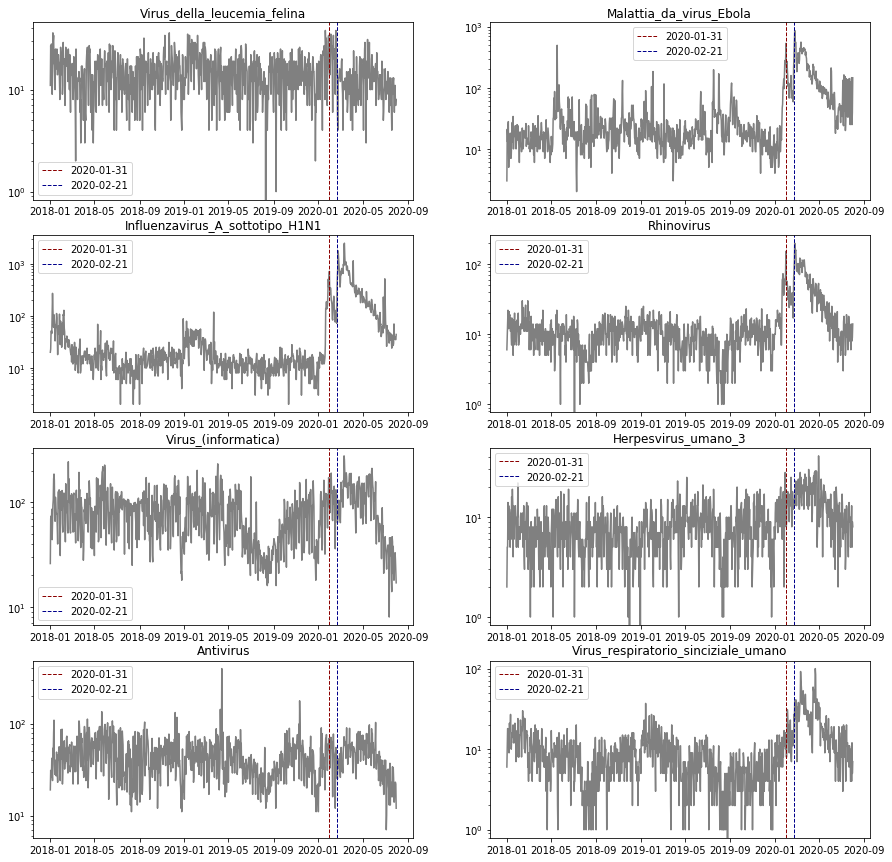

In [115]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
specific_date = ['20200131', '20200221']
specific_date = [datetime.datetime.strptime(date, '%Y%m%d').date() for date in specific_date]

for i, (name, element) in enumerate(virus.iterrows()):
    row = int(i / 2)
    col = int(i % 2)
    axs[row, col].plot(element, color='grey')
    axs[row, col].set_yscale('log')
    axs[row, col].axvline(x = specific_date[0], linewidth=1, color ='darkred', linestyle='--', label='2020-01-31') 
    axs[row, col].axvline(x = specific_date[1], linewidth=1, color ='darkblue', linestyle='--', label='2020-02-21') 
    axs[row, col].legend()  
    axs[row, col].set_title(name)

plt.show()

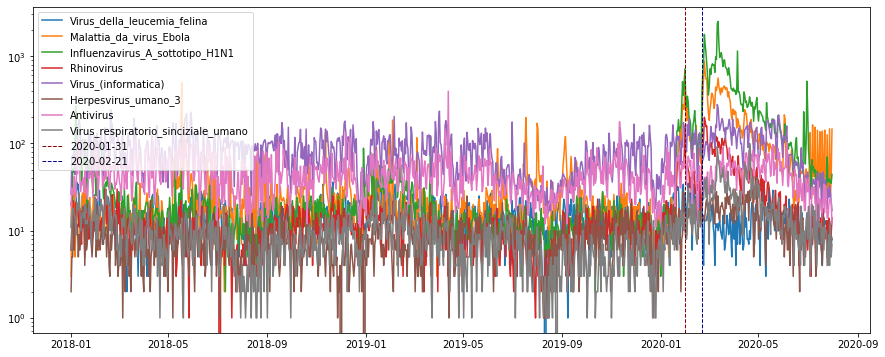

In [109]:
import matplotlib.pyplot as plt
import datetime
plt.figure(figsize=(15,6)) # change this if needed
### ~ 3.2.2
### Your code here! ###
specific_date = ['20200131', '20200221']
specific_date = [datetime.datetime.strptime(date, '%Y%m%d').date() for date in specific_date]


for i, (name, row) in enumerate(virus.iterrows()):
    plt.plot(row, label = name)
plt.yscale('log')

plt.axvline(x = specific_date[0], linewidth=1, color ='darkred', linestyle='--', label='2020-01-31') 
plt.axvline(x = specific_date[1], linewidth=1, color ='darkblue', linestyle='--', label='2020-02-21') 
plt.legend(loc = 'upper left')  
plt.show()

# 31 January (first case reported in Italy) and 21 February 

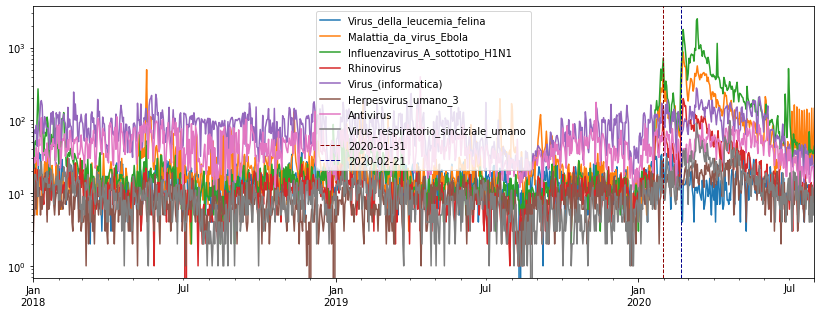

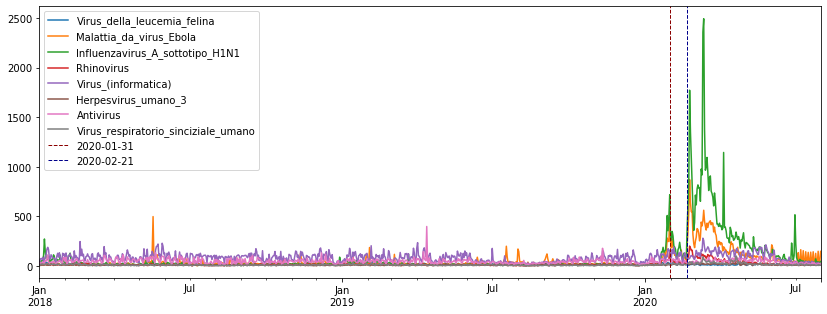

In [95]:
ax = virus.T.plot(figsize = (14, 5))

ax.axvline(x = specific_date[0], linewidth=1, color ='darkred', linestyle='--', label='2020-01-31') 
ax.axvline(x = specific_date[1], linewidth=1, color ='darkblue', linestyle='--', label='2020-02-21') 
ax.set_yscale('log')
ax.legend() 

ax = virus.T.plot(figsize = (14, 5))

ax.axvline(x = specific_date[0], linewidth=1, color ='darkred', linestyle='--', label='2020-01-31') 
ax.axvline(x = specific_date[1], linewidth=1, color ='darkblue', linestyle='--', label='2020-02-21') 
# ax.set_yscale('log')
ax.legend()  

In [8]:
### ~ 3.2.3
### Your text here! ###


### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

In [11]:
articles = articles.set_index('index')

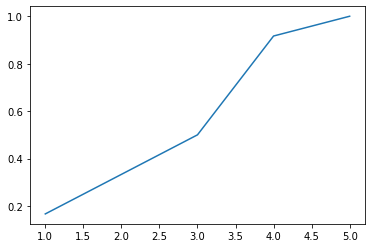

In [168]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

vals = np.array([1,2,3,4,1,2,4,3,4,4,5,4])
x, y = get_cdf(vals)
plt.plot(x, y)
plt.show()

In [116]:
### ~ 3.3.1
### Your code here! ###


In [10]:
### ~ 3.3.3
### Your text here! ###

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

In [119]:
articles = articles.set_index('index')

In [120]:
articles.columns = pd.to_datetime(articles.columns)

In [121]:
articles_grouped = articles.T.groupby(pd.Grouper(freq='D')).sum()
articles_grouped = articles_grouped.loc['20200131':'20200731'].T

In [122]:
articles_grouped

,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
index,,,,,,,,,,,,,,,,,,,,,
Khulna,0,1,0,2,2,3,0,0,3,3,...,0,1,1,0,1,1,0,2,1,2
Karim_Ansarifard,3,1,0,2,0,2,1,0,2,0,...,2,2,0,1,2,0,1,0,0,0
Poldhu,2,1,0,2,1,1,4,0,0,1,...,0,2,2,0,0,0,2,1,2,1
Alice_(The_Sisters_of_Mercy),0,0,1,0,1,0,3,1,0,1,...,0,0,0,0,0,1,0,0,0,0
Palmyra,1,0,0,3,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Metodologia_della_formazione,6,5,7,12,6,16,12,10,5,2,...,9,8,7,7,2,14,9,7,6,9
Metal_Black,0,1,1,1,1,0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
Tonino_Accolla,37,54,35,51,49,44,38,137,67,47,...,43,40,39,46,33,67,43,53,77,58


In [66]:
article_sum[0:10]

2020-01-01    179885
2020-01-02    294016
2020-01-03    290670
2020-01-04    250035
2020-01-05    254762
2020-01-06    281117
2020-01-07    368110
2020-01-08    346363
2020-01-09    344640
2020-01-10    332639
Freq: D, dtype: int64

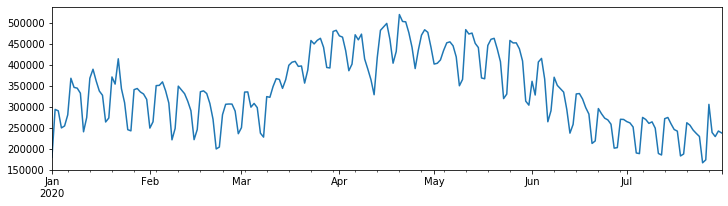

In [126]:
article_sum = articles.sum(axis=0)
article_sum = article_sum.groupby(pd.Grouper(freq='D')).sum()
article_sum = article_sum.loc['20200101':'20200831']
article_sum.T.plot(figsize = (12, 3))

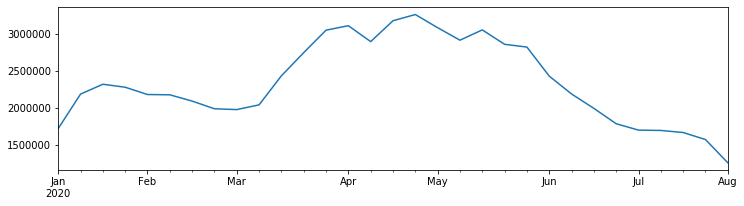

In [127]:
article_sum = articles.sum(axis=0)
article_sum = article_sum.groupby(pd.Grouper(freq='W')).sum()
article_sum = article_sum.loc['20200101':'20200831']
article_sum.T.plot(figsize = (12, 3))

In [11]:
plt.figure(figsize=(14,3)) # change this if needed

### ~ 4.1.1
### Your code here! ###

<Figure size 1008x216 with 0 Axes>

<Figure size 1008x216 with 0 Axes>

In [12]:
### ~ 4.1.2
### Your text here! ###

In [13]:
plt.figure(figsize=(14,3)) # change this if needed

### ~ 4.1.3
### Your code here! ###

<Figure size 1008x216 with 0 Axes>

<Figure size 1008x216 with 0 Axes>

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

In [128]:
article_sum = articles.sum(axis=0)
# article_sum = article_sum.groupby(pd.Grouper(freq='W')).sum()
article_sum_19 = article_sum.loc['20190101':'20191231'].to_frame('Sum')
article_sum_20 = article_sum.loc['20200101':'20200831'].to_frame('Sum')

article_sum_19['DayOfYear'] = article_sum_19.index.to_series().dt.dayofyear
article_sum_20['DayOfYear'] = article_sum_20.index.to_series().dt.dayofyear

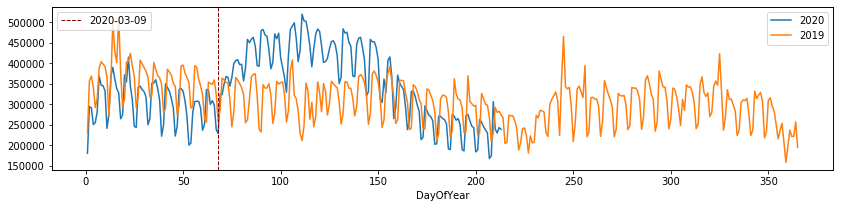

In [129]:
fig, ax = plt.subplots(figsize=(14,3))

article_sum_20.plot(x='DayOfYear', y='Sum', ax = ax, label = '2020')
article_sum_19.plot(x='DayOfYear', y='Sum', ax = ax, label = '2019')
ax.legend(loc='upper right')

ax2 = ax.twinx()
ax2.axvline(x = 68, linewidth=1, color ='darkred', linestyle='--', label='2020-03-09') 
ax2.legend(loc='upper left')
ax2.get_yaxis().set_visible(False)

# plt.legend()
plt.show()

In [130]:
article_sum = articles.sum(axis=0)
article_sum = article_sum.groupby(pd.Grouper(freq='W')).sum()
article_sum_19 = article_sum.loc['20190101':'20191231'].to_frame('Sum')
article_sum_20 = article_sum.loc['20200101':'20200831'].to_frame('Sum')

article_sum_19['WeekOfYear'] = article_sum_19.index.to_series().dt.weekofyear
article_sum_20['WeekOfYear'] = article_sum_20.index.to_series().dt.weekofyear

In [131]:
article_sum_20.loc['2020-03-08']

Sum           2042564
WeekOfYear         10
Name: 2020-03-08 00:00:00, dtype: int64

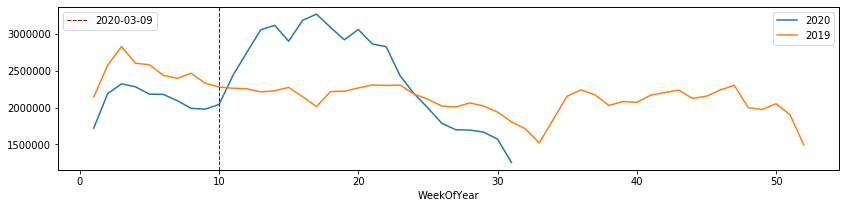

In [132]:
fig, ax = plt.subplots(figsize=(14,3))

article_sum_20.plot(x='WeekOfYear', y='Sum', ax = ax, label = '2020')
article_sum_19.plot(x='WeekOfYear', y='Sum', ax = ax, label = '2019')
ax.legend(loc='upper right')

ax2 = ax.twinx()
ax2.axvline(x = 10, linewidth=1, color ='darkred', linestyle='--', label='2020-03-09') 
ax2.legend(loc='upper left')
ax2.get_yaxis().set_visible(False)

plt.show()

In [14]:
plt.figure(figsize=(14,3)) # change this if needed

### ~ 4.2.1
## Your code here! ###

<Figure size 1008x216 with 0 Axes>

<Figure size 1008x216 with 0 Axes>

In [15]:
### ~ 4.2.2
### Your text here! ###

## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

In [219]:
# topics = topics.set_index('index')

In [138]:
topics['index'] = topics['index'].map(mapping)
topics

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
0,Dietetica_cinese,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,Battaglia_di_Naisso,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Battaglia_di_Stoke_Field,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,Lissotriton_vulgaris,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35606,Banca_Akros,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35607,Arms_Around_You,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35608,Gioventù_bruciata_(album_Mahmood),False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35609,Power_Rangers:_Battle_for_the_Grid,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [139]:
articles

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
index,,,,,,,,,,,,,,,,,,,,,
Khulna,0,2,1,0,0,2,0,2,0,1,...,0,1,1,0,1,1,0,2,1,2
Karim_Ansarifard,1,5,1,1,1,3,6,4,5,6,...,2,2,0,1,2,0,1,0,0,0
Poldhu,0,0,1,1,0,1,0,2,2,3,...,0,2,2,0,0,0,2,1,2,1
Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Palmyra,1,4,0,0,0,2,11,2,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Metodologia_della_formazione,1,8,8,9,4,4,2,5,16,15,...,9,8,7,7,2,14,9,7,6,9
Metal_Black,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
Tonino_Accolla,66,98,84,95,99,79,59,81,77,83,...,43,40,39,46,33,67,43,53,77,58


In [140]:
merged = pd.merge(topics, articles, left_on='index', right_on='index', how='inner')
merged

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Dietetica_cinese,False,False,False,False,False,False,False,False,False,...,0,0,6,0,2,0,1,1,0,0
1,Battaglia_di_Naisso,False,False,True,False,False,False,False,False,False,...,1,3,0,0,2,3,2,3,1,2
2,Battaglia_di_Stoke_Field,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,1,0,0,1
3,Lissotriton_vulgaris,False,False,False,False,False,False,False,False,False,...,6,3,2,1,5,3,0,0,1,6
4,Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,...,1,1,4,1,2,5,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35606,Banca_Akros,False,False,False,False,False,False,False,False,False,...,1,3,5,2,4,7,9,2,3,2
35607,Arms_Around_You,False,False,False,False,False,False,False,False,False,...,2,0,0,1,0,0,0,0,2,1
35608,Gioventù_bruciata_(album_Mahmood),False,False,False,False,False,False,False,False,False,...,14,9,10,13,17,25,17,9,19,15
35609,Power_Rangers:_Battle_for_the_Grid,False,False,False,False,False,False,False,False,False,...,2,1,4,1,1,2,1,7,2,0


In [ ]:
articles_col = articles.columns[1:]#[731:]
topics_col = topics.columns[1:]
df = merged.melt(id_vars = articles_col, value_vars = topics_col, var_name='topics')

In [42]:
df = df.loc[df['value'] == True].groupby('topics')[articles_col].sum()#.reset_index()

In [43]:
df

,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
topics,,,,,,,,,,,,,,,,,,,,,
Culture.Biography.Biography*,46446,68832,68853,59853,61040,63697,80360,74489,74198,73218,...,54600,53177,57053,42743,43668,121292,59043,56121,61911,75470
Culture.Biography.Women,9234,12957,13882,11726,13752,14736,15290,14121,14739,14185,...,10868,10716,10776,8714,10370,11680,11901,10841,12839,24281
Culture.Food and drink,1793,2784,2910,2423,2352,2694,3777,3945,3648,3468,...,2605,2543,2293,1613,1592,2438,2542,2336,2510,2179
Culture.Internet culture,5016,8164,7626,6424,6503,6994,9043,8350,8540,8011,...,8384,8408,7437,5218,5014,7660,7049,6988,7177,6640
Culture.Linguistics,1528,2460,2583,2176,2291,2633,3378,3562,3680,3918,...,4080,2937,2043,1451,1712,3860,2837,2361,2507,1951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STEM.Medicine & Health,3865,8988,9532,8274,8318,8845,12714,11905,12721,11362,...,9987,8939,8092,6070,5993,9149,8684,8146,8153,7144
STEM.Physics,2060,4685,4910,4353,4518,5501,6570,7112,6825,6146,...,4200,3992,3491,2553,2367,3652,3638,3276,3151,2728
STEM.STEM*,23349,48663,51255,41273,42000,48989,67964,68566,67948,64314,...,48457,46732,42458,27656,27335,44887,42971,41555,44924,38000


In [44]:
df.columns = pd.to_datetime(df.columns)

In [127]:
df_pageview = pd.melt(df.reset_index(), id_vars='topics', value_vars = df.columns, var_name='date', value_name = 'views')

In [128]:
df_pageview

,topics,date,views
0,Culture.Biography.Biography*,2020-01-01,46446
1,Culture.Biography.Women,2020-01-01,9234
2,Culture.Food and drink,2020-01-01,1793
3,Culture.Internet culture,2020-01-01,5016
4,Culture.Linguistics,2020-01-01,1528
...,...,...,...
13627,STEM.Medicine & Health,2020-07-31,7144
13628,STEM.Physics,2020-07-31,2728
13629,STEM.STEM*,2020-07-31,38000
13630,STEM.Space,2020-07-31,1537


In [16]:
### ~ 5.1.1
### Your code here! ###

### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

In [132]:
def quarantinePeriod(df_pagevie):
    pre_Quarantine = df_pageview[(df_pageview['date'] >= '2020-02-03') & (df_pageview['date'] < '2020-03-09')]
    Quarantine = df_pageview[(df_pageview['date'] >= '2020-03-09') & (df_pageview['date'] < '2020-04-11')]

    pre_Quarantine_mean = pre_Quarantine.groupby('topics')['views'].mean().to_frame()
    Quarantine_mean = Quarantine.groupby('topics')['views'].mean().to_frame()

    pre_Quarantine_mean['Period'] = 'Before'
    Quarantine_mean['Period'] = 'During'
    
    frames = [pre_Quarantine_mean, Quarantine_mean]
    df = pd.concat(frames)
    df = df.reset_index()
    
    return df

In [133]:
data1 = quarantinePeriod(df_pageview)

In [134]:
data1

,topics,views,Period
0,Culture.Biography.Biography*,64463.771429,Before
1,Culture.Biography.Women,12584.057143,Before
2,Culture.Food and drink,3210.714286,Before
3,Culture.Internet culture,8280.885714,Before
4,Culture.Linguistics,2922.857143,Before
...,...,...,...
123,STEM.Medicine & Health,17403.181818,During
124,STEM.Physics,7990.333333,During
125,STEM.STEM*,82914.424242,During
126,STEM.Space,2980.696970,During


<Figure size 1440x4320 with 0 Axes>

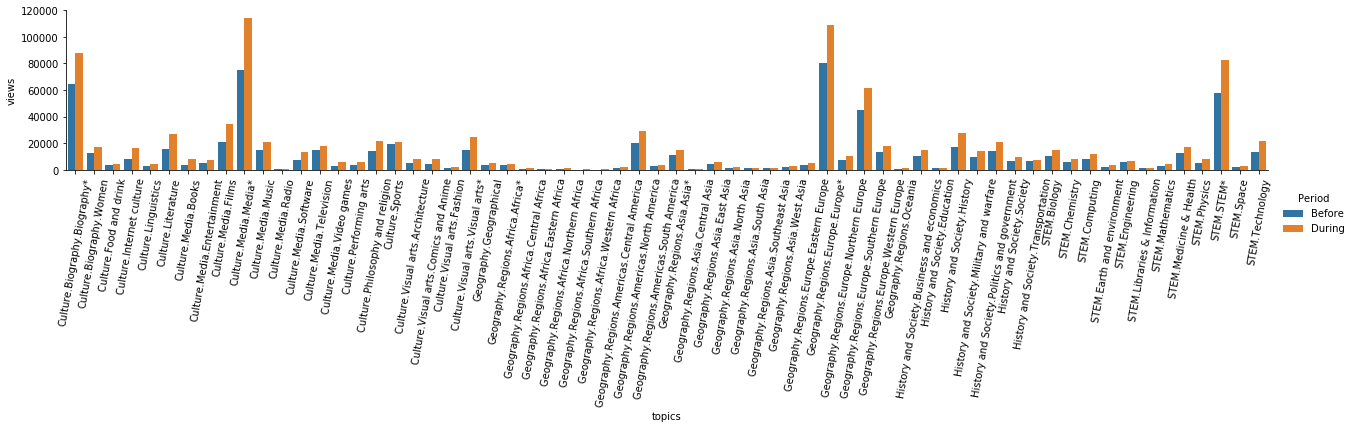

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 60))
ax = sns.catplot(x="topics", y="views", hue="Period", kind="bar", data=data1, height=3, aspect=6)
ax.set_xticklabels(rotation=80)

In [ ]:
## 前後比例變化

In [71]:
data = pd.merge(pre_Quarantine_mean, Quarantine_mean, left_index=True, right_index=True)
data = data.rename(columns={"views_x": "preQuarantine", "views_y": "Quarantine"})
data

,preQuarantine,Quarantine
topics,,
Culture.Biography.Biography*,64463.771429,87825.636364
Culture.Biography.Women,12584.057143,17109.272727
Culture.Food and drink,3210.714286,4343.060606
Culture.Internet culture,8280.885714,16025.515152
Culture.Linguistics,2922.857143,3950.333333
...,...,...
STEM.Medicine & Health,12457.800000,17403.181818
STEM.Physics,5290.828571,7990.333333
STEM.STEM*,57515.085714,82914.424242


In [118]:
import seaborn as sns
plt.figure(figsize=(14,10)) # change this if needed

### ~ 5.2
### Your code here! ###

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

In [129]:
df_pageview

,topics,date,views
0,Culture.Biography.Biography*,2020-01-01,46446
1,Culture.Biography.Women,2020-01-01,9234
2,Culture.Food and drink,2020-01-01,1793
3,Culture.Internet culture,2020-01-01,5016
4,Culture.Linguistics,2020-01-01,1528
...,...,...,...
13627,STEM.Medicine & Health,2020-07-31,7144
13628,STEM.Physics,2020-07-31,2728
13629,STEM.STEM*,2020-07-31,38000
13630,STEM.Space,2020-07-31,1537


In [130]:
sum_pageview = df_pageview.groupby('date')['views'].sum().to_frame().rename(columns={'views':'sum'}).reset_index()
sum_pageview

,date,sum
0,2020-01-01,456466
1,2020-01-02,737993
2,2020-01-03,730513
3,2020-01-04,630334
4,2020-01-05,642658
...,...,...
208,2020-07-27,780016
209,2020-07-28,584156
210,2020-07-29,557737
211,2020-07-30,598265


In [137]:
df_pageview_ratio = pd.merge(df_pageview, sum_pageview, left_on = 'date', right_on = 'date', how = 'outer')
df_pageview_ratio['ratio'] = df_pageview_ratio['views'] / df_pageview_new['sum']
df_pageview_ratio

,topics,date,views,sum,ratio
0,Culture.Biography.Biography*,2020-01-01,46446,456466,0.101751
1,Culture.Biography.Women,2020-01-01,9234,456466,0.020229
2,Culture.Food and drink,2020-01-01,1793,456466,0.003928
3,Culture.Internet culture,2020-01-01,5016,456466,0.010989
4,Culture.Linguistics,2020-01-01,1528,456466,0.003347
...,...,...,...,...,...
13627,STEM.Medicine & Health,2020-07-31,7144,605250,0.011803
13628,STEM.Physics,2020-07-31,2728,605250,0.004507
13629,STEM.STEM*,2020-07-31,38000,605250,0.062784
13630,STEM.Space,2020-07-31,1537,605250,0.002539


In [148]:
def quarantinePeriod(df_pageview):
    pre_Quarantine = df_pageview[(df_pageview['date'] >= '2020-02-03') & (df_pageview['date'] < '2020-03-09')]
    Quarantine = df_pageview[(df_pageview['date'] >= '2020-03-09') & (df_pageview['date'] < '2020-04-11')]

    pre_Quarantine_mean = pre_Quarantine.groupby('topics')['ratio'].mean().to_frame()
    Quarantine_mean = Quarantine.groupby('topics')['ratio'].mean().to_frame()

    pre_Quarantine_mean['Period'] = 'Before'
    Quarantine_mean['Period'] = 'During'
    
    frames = [pre_Quarantine_mean, Quarantine_mean]
    df = pd.concat(frames)
    df = df.reset_index()
    
    return df

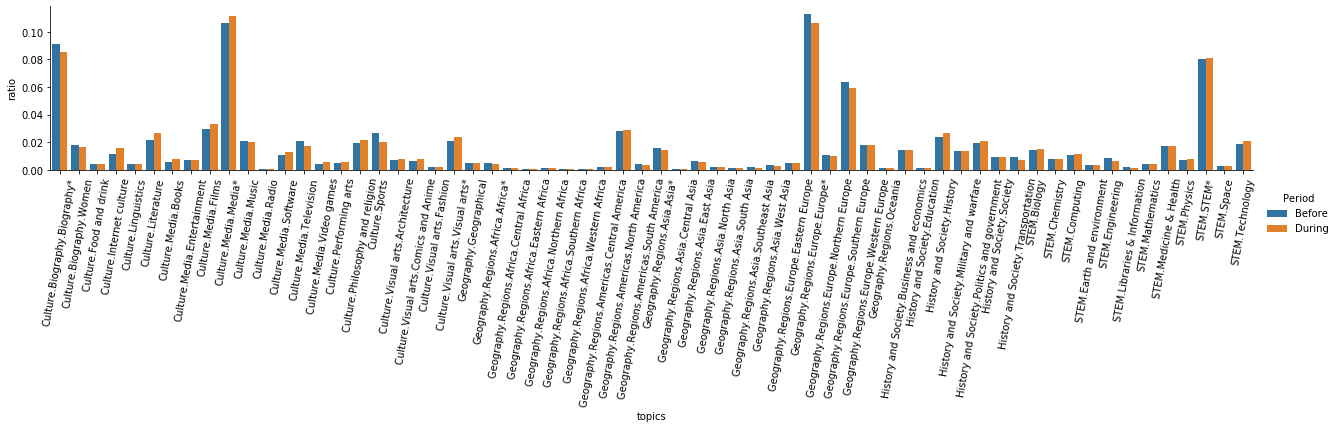

In [149]:
data = quarantinePeriod(df_pageview_ratio)

ax = sns.catplot(x="topics", y="ratio", hue="Period", kind="bar", data=data, height=3, aspect=6)
ax.set_xticklabels(rotation=80)

In [18]:
### ~ 5.3.1
### Your code here! ###

In [19]:
### ~ 5.3.2
### Your code here! ###

In [21]:
### ~ 5.3.3
### Your text here! ###

---